In [1]:
# Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import seaborn as sns

In [3]:
# Loading the dataset
cars = pd.read_csv('car_prices.csv')
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
# Checking the kind of data we are dealing with
print(f"Number of Columns: {cars.shape[1]}")
print(f"Number of Rows: {cars.shape[0]}")

Number of Columns: 16
Number of Rows: 558837


In [9]:
# Statistical data of cars dataset
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [10]:
# Descriptive statistics for the columns of the DataFrame that have an object data type
cars.describe(include = object)

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548536,548438,548186,545642,493485,558833,558837,558088,558088,558837,558825
unique,96,973,1963,87,4,550297,64,46,17,14263,3766
top,Ford,Altima,Base,Sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475915,22,82945,110970,244329,19693,5334


In [11]:
# Checking for nulls and cleaning the dataset
pd.DataFrame({'counts':cars.shape[0],
              'nulls':cars.isnull().sum(),
              'nulls%':cars.isnull().mean()*100,
              'cardinality':cars.nunique(),
             })

,counts,nulls,nulls%,cardinality
year,558837,0,0.000000,34
make,558837,10301,1.843292,96
model,558837,10399,1.860829,973
trim,558837,10651,1.905922,1963
body,558837,13195,2.361154,87
transmission,558837,65352,11.694287,4
vin,558837,4,0.000716,550297
state,558837,0,0.000000,64
condition,558837,11820,2.115107,41
odometer,558837,94,0.016821,172278


In [12]:
# Cleaning the dataset
missing_values=cars.isnull()
overlapping_missing_values = missing_values.sum(axis = 1)
clean_cars = cars[overlapping_missing_values == 0]

In [13]:
# Checking null values after cleaning
pd.DataFrame({'counts': clean_cars.shape[0],
              'nulls': clean_cars.isnull().sum(),
              'nulls%': clean_cars.isnull().mean()*100,
              'cardinality': clean_cars.nunique(),
              })

,counts,nulls,nulls%,cardinality
year,472325,0,0.0,26
make,472325,0,0.0,53
model,472325,0,0.0,768
trim,472325,0,0.0,1494
body,472325,0,0.0,85
transmission,472325,0,0.0,2
vin,472325,0,0.0,465768
state,472325,0,0.0,34
condition,472325,0,0.0,41
odometer,472325,0,0.0,160427


In [16]:
# Dimensions of Dataset before cleaning:
# Number of Columns: 16
# Number of Rows: 558837
# ---------------------------------------
# Dimensions of Dataset after cleaning:
print(f"Number of clean Columns: {clean_cars.shape[1]}")
print(f"Number of clean Rows: {clean_cars.shape[0]}")

Number of clean Columns: 16
Number of clean Rows: 472325


# Graphical Summaries and Visualizations

### Business Scenario/problem

A business is looking to launch a used car dealership has reached out to me as a data analyst for insights and summaries regarding the size of the overall US market and the most popular car models.

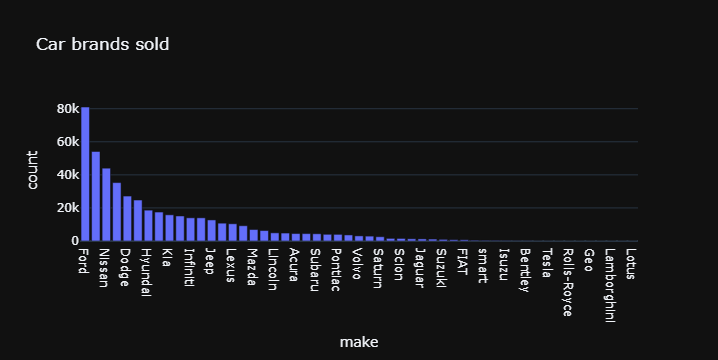

In [21]:
# A bar graph of the car brands sold
car_make = clean_cars['make'].value_counts()
px.bar(car_make,
       y = 'count',
       title = 'Car brands sold',
       template = 'plotly_dark',
      )

Top Car brand sold in the US is Ford reaching just above the 80k mark. Then followed by Chevrolet with above 50k, Nissian, Toyota and Dodge follow.

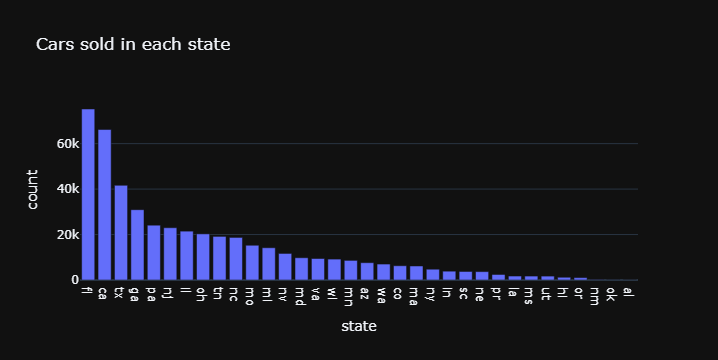

In [22]:
# A bar graph for cars sold in each state
state = clean_cars['state'].value_counts()
px.bar(state,
       y='count',
      title = 'Cars sold in each state',
       template='plotly_dark'
      )

Florida, California and Texas are the states that sell the most 2nd hand cars with Florida and California selling more then 60k cars.